In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
from pathlib import Path
#from google.colab import drive

# 1. Mount Google Drive
# This will prompt for permission if you haven't mounted it in this session yet.
#drive.mount('/content/drive')

# Visualization configuration
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# --- REFACTOR STARTS HERE ---

# 2. Define your Base Directory in Drive
# CHANGE 'My_Project_Folder' to the actual folder name in your Google Drive.
# If your data is right in the main Drive area, remove 'My_Project_Folder'.
BASE_DIR = Path("/content/drive/MyDrive/Colab_Notebooks/") # Corrected to be a directory path

# 3. Define File Paths using the Base Directory
# This assumes you have the same 'data/raw' structure inside that Drive folder.
RAW_DATA_PATH = BASE_DIR / "complaints.csv"
PROCESSED_DATA_PATH = BASE_DIR / "filtered_complaints.csv" # Uncommented and defined
RAW_TEXT_PATH = BASE_DIR / "filtered_complaints_raw.csv"
CLEAN_TEXT_PATH = BASE_DIR / "filtered_complaints_clean.csv"

#local files
# File paths
RAW_DATA_PATH = Path("../data/raw/complaints.csv")
PROCESSED_DATA_PATH = Path("../data/processed/filtered_complaints.csv")

# 4. Ensure output directory exists
# This works the same way on Drive as it does locally!
PROCESSED_DATA_PATH.parent.mkdir(parents=True, exist_ok=True)

print(f"Raw data path set to: {RAW_DATA_PATH}")
print(f"Processed data path set to: {PROCESSED_DATA_PATH}")
print(f"Processed data path set to: {RAW_TEXT_PATH}")
print(f"Processed data path set to: {CLEAN_TEXT_PATH}")

# --- REFACTOR ENDS HERE ---

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Raw data path set to: /content/drive/MyDrive/Colab_Notebooks/complaints.csv
Processed data path set to: /content/drive/MyDrive/Colab_Notebooks/filtered_complaints.csv
Processed data path set to: /content/drive/MyDrive/Colab_Notebooks/filtered_complaints_raw.csv
Processed data path set to: /content/drive/MyDrive/Colab_Notebooks/filtered_complaints_clean.csv


In [6]:
print("Loading CFPB complaints dataset...")
df = pd.read_csv(RAW_DATA_PATH, low_memory=False)

print(f"Initial dataset shape: {df.shape}")

print("\nDataset columns:")
display(df.columns)

print("\nSample records:")
display(df.head(5))


Loading CFPB complaints dataset...
Initial dataset shape: (9609797, 18)

Dataset columns:


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


Sample records:


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [7]:
print("Missing value summary (top 1500):")
display(
    df.isnull()
      .sum()
      .sort_values(ascending=False)
      .head(1500)
)


Missing value summary (top 1500):


,0
Tags,8981029
Consumer disputed?,8841498
Consumer complaint narrative,6629041
Company public response,4770207
Consumer consent provided?,1649561
Sub-issue,839522
Sub-product,235295
State,54516
ZIP code,30228
Company response to consumer,20


,count
Product,
Credit reporting or other personal consumer reports,4834855
"Credit reporting, credit repair services, or other personal consumer reports",2163857
Debt collection,799197
Mortgage,422254
Checking or savings account,291178
Credit card,226686
Credit card or prepaid card,206369
"Money transfer, virtual currency, or money service",145066
Credit reporting,140429


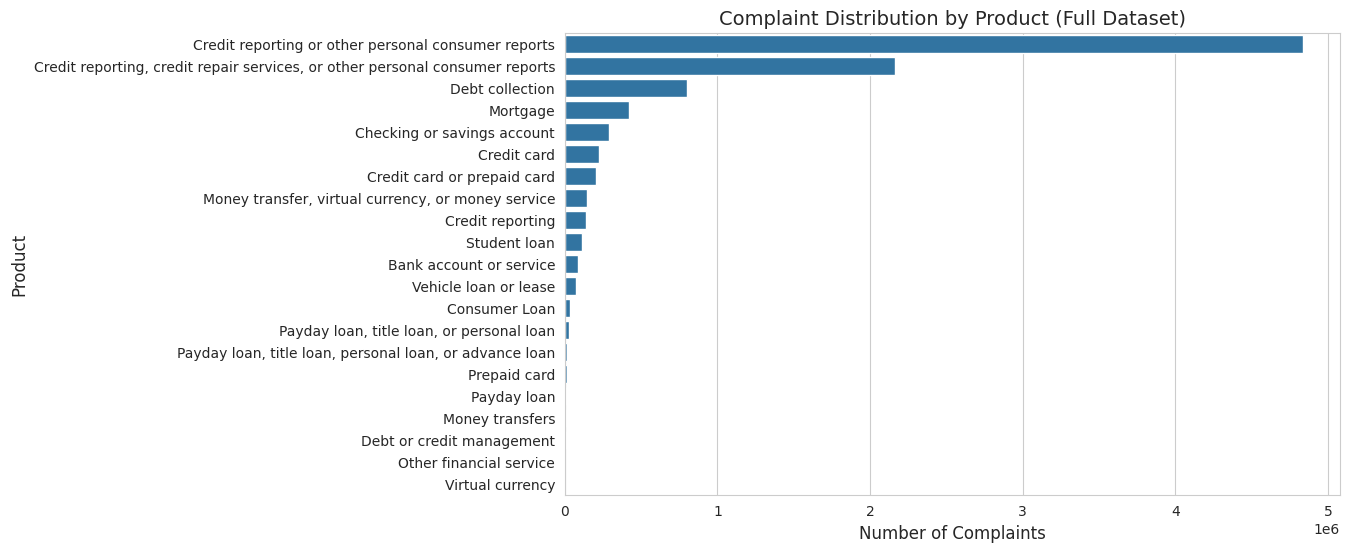

In [8]:
product_counts = df["Product"].value_counts()

display(product_counts)

sns.barplot(
    y=product_counts.index,
    x=product_counts.values
)
plt.title("Complaint Distribution by Product (Full Dataset)")
plt.xlabel("Number of Complaints")
plt.ylabel("Product")
plt.show()


In [ ]:
narrative_present = df["Consumer complaint narrative"].notna().sum()
narrative_missing = df["Consumer complaint narrative"].isna().sum()

print(f"Complaints with narratives: {narrative_present}")
print(f"Complaints without narratives: {narrative_missing}")


Complaints with narratives: 2980756
Complaints without narratives: 6629041


,narrative_word_count
count,9.609797e+06
mean,5.446667e+01
std,1.497672e+02
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,5.000000e+01
max,6.469000e+03


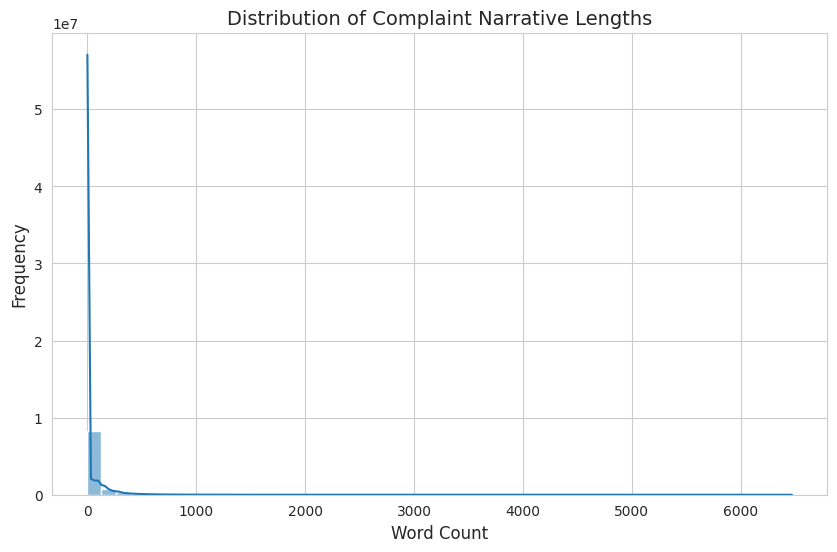

In [ ]:
df["narrative_word_count"] = (
    df["Consumer complaint narrative"]
    .fillna("")
    .apply(lambda x: len(x.split()))
)

display(df["narrative_word_count"].describe())
sns.histplot(
    df["narrative_word_count"],
    bins=50,
    kde=True
)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [ ]:
unique_products = sorted(df["Product"].dropna().unique())

print(f"Total unique product labels: {len(unique_products)}")
for p in unique_products:
    print(p)


Total unique product labels: 21
Bank account or service
Checking or savings account
Consumer Loan
Credit card
Credit card or prepaid card
Credit reporting
Credit reporting or other personal consumer reports
Credit reporting, credit repair services, or other personal consumer reports
Debt collection
Debt or credit management
Money transfer, virtual currency, or money service
Money transfers
Mortgage
Other financial service
Payday loan
Payday loan, title loan, or personal loan
Payday loan, title loan, personal loan, or advance loan
Prepaid card
Student loan
Vehicle loan or lease
Virtual currency


In [16]:
CANONICAL_PRODUCT_MAP = {
    "Credit card": [
        "credit card",
        "prepaid card"
    ],
    "Personal loan": [
        "personal loan",
        "payday loan",
        "title loan",
        "advance loan",
        "Consumer Loan"
    ],
    "Buy Now, Pay Later (BNPL)": [
        "buy now pay later",
        "bnpl",
        "debt collection",
        "Credit reporting",
        "other financial service",
        "affirm",
        "afterpay",
        "mortgage"
    ],
    "Savings account": [
        "savings account",
        "checking account",
        "bank account",
        "service",
    ],
    "Money transfers": [
        "money transfer",
        "virtual currency",
        "money service"
    ]
}


In [17]:
def normalize_product(product: str):
    if not isinstance(product, str):
        return None

    product_lower = product.lower()

    for canonical, keywords in CANONICAL_PRODUCT_MAP.items():
        for keyword in keywords:
            if keyword in product_lower:
                return canonical

    return None


In [18]:
df["canonical_product"] = df["Product"].apply(normalize_product)

print("Canonical product distribution (including unmatched):")
display(df["canonical_product"].value_counts(dropna=False))


Canonical product distribution (including unmatched):


,count
canonical_product,
None,5194579
Savings account,2686306
"Buy Now, Pay Later (BNPL)",1222509
Credit card,448335
Personal loan,52696
Money transfers,5372


In [19]:
df_filtered = df[
    df["canonical_product"].notna() &
    df["Consumer complaint narrative"].notna()
    ].copy()

print(f"Dataset shape before filtering: {df.shape}")
print(f"Dataset shape after filtering: {df_filtered.shape}")

print("Final canonical product distribution:")
display(df_filtered["canonical_product"].value_counts())


Dataset shape before filtering: (9609797, 19)
Dataset shape after filtering: (1752720, 19)
Final canonical product distribution:


,count
canonical_product,
Savings account,1059673
"Buy Now, Pay Later (BNPL)",466528
Credit card,197126
Personal loan,27880
Money transfers,1513


,count
canonical_product,
Savings account,1059673
"Buy Now, Pay Later (BNPL)",466528
Credit card,197126
Personal loan,27880
Money transfers,1513


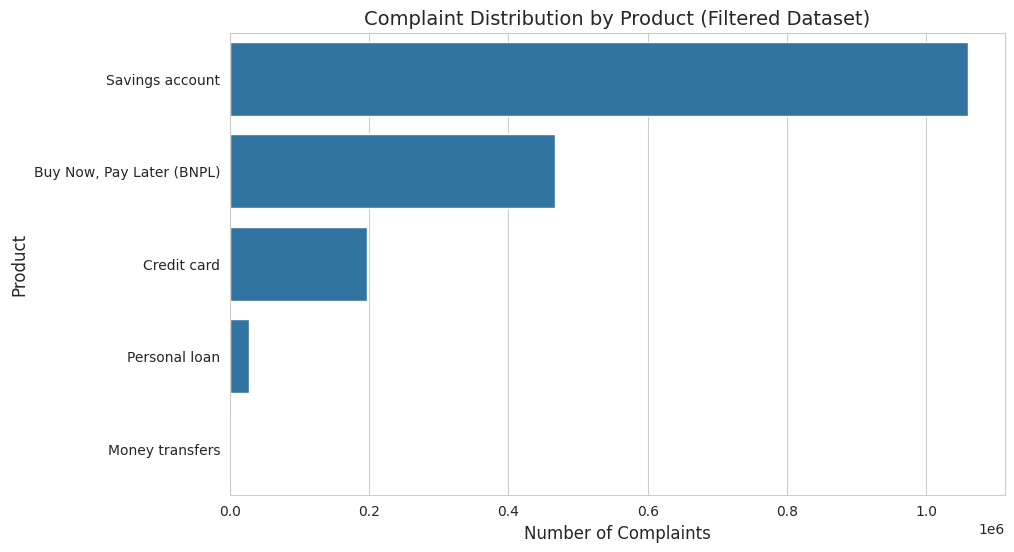

In [20]:
filtered_product_counts = df_filtered["canonical_product"].value_counts()

display(filtered_product_counts)

sns.barplot(
    y=filtered_product_counts.index,
    x=filtered_product_counts.values
)
plt.title("Complaint Distribution by Product (Filtered Dataset)")
plt.xlabel("Number of Complaints")
plt.ylabel("Product")
plt.show()


In [21]:
def clean_narrative(text: str) -> str:
    if not isinstance(text, str):
        return ""

    text = text.lower()

    text = re.sub(r"x{2,}", "", text)

    boilerplate_patterns = [
        r"i am writing to file a complaint",
        r"this complaint is about",
        r"i would like to file a complaint"
    ]

    for pattern in boilerplate_patterns:
        text = re.sub(pattern, "", text)

    text = re.sub(r"[^a-z0-9\s.,!?]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    return text


In [22]:
print("Cleaning complaint narratives...")
df_filtered["cleaned_narrative"] = df_filtered[
    "Consumer complaint narrative"
].apply(clean_narrative)

display(
    df_filtered[
        ["Consumer complaint narrative", "cleaned_narrative"]
    ].sample(3, random_state=42)
)


Cleaning complaint narratives...


,Consumer complaint narrative,cleaned_narrative
7773647,I'm unable to lift the credit freeze placed on...,i m unable to lift the credit freeze placed on...
4129628,On XX/XX/2022 I had got a email from synchrony...,on 2022 i had got a email from synchrony bank ...
791982,PLEASE BLOCKED AND REMOVED I respectfully requ...,please blocked and removed i respectfully requ...


In [23]:
##%%
df_filtered[
    ["canonical_product", "Consumer complaint narrative"]
].to_csv(RAW_TEXT_PATH, index=False)

df_filtered[
    ["canonical_product", "cleaned_narrative"]
].to_csv(CLEAN_TEXT_PATH, index=False)

print("Saved raw and cleaned datasets separately")


Saved raw and cleaned datasets separately


In [ ]:
df_filtered.to_csv(PROCESSED_DATA_PATH, index=False)

print(f"Filtered and cleaned dataset saved to: {PROCESSED_DATA_PATH}")
